In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [20]:
from sqlalchemy import create_engine, inspect

In [25]:

inspector = inspect(engine)
inspector.get_table_names()
columns=inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [26]:
columns=inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station
# Print all of the classes mapped to the Base


In [33]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


2016-08-23


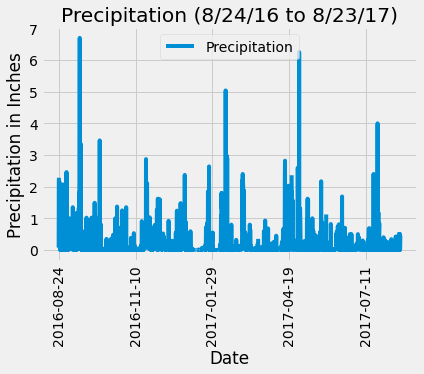

In [101]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
scores=session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date> last_year).\
order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df= pd.DataFrame(scores)
scores_df_2=scores_df.rename(columns={0:"prcp",
                         1:"date"})

# Sort the dataframe by date
scores_df_2.sort_values(by= ["date"]).dropna()

# Use Pandas Plotting with Matplotlib to plot the data
#scores_df_2.plot(kind = "bar", figsize=(20,6))
#plt.show()

# plot the dataframe
scores_df_2.plot('date','prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.show()

In [107]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean=scores_df_2["prcp"].mean()
std=scores_df_2["prcp"].std()
maximum=scores_df_2["prcp"].max()
minimum=scores_df_2["prcp"].mean()
lowerq=scores_df_2["prcp"].quantile(q=0.25)
upperq=scores_df_2["prcp"].quantile(q=0.75)
median=scores_df_2["prcp"].quantile(q=0.5)
print(f"From 8/23/17 to 8/24/16 the summary statistics for precipitation is as follows:\n average prcp:{mean},\n std prcp = {std}, \n min ={minimum}, \n max={maximum}, \n median={median}, \n upper quartile={upperq}, \n lower qiartile={lowerq}.")
    

From 8/23/17 to 8/24/16 the summary statistics for precipitation is as follows:
 average prcp:0.1764615384615378,
 std prcp = 0.4602883636813204, 
 min =0.1764615384615378, 
 max=6.7, 
 median=0.02, 
 upper quartile=0.13, 
 lower qiartile=0.0.


# Exploratory Station Analysis

In [116]:
# Design a query to calculate the total number stations in the dataset
station_number=session.query(Station.station).count()
print(f"There are total number of {station_number} stations.")

There are total number of 9 stations.


In [144]:
df=pd.read_sql("SELECT * FROM measurement", con)
df.groupby(["station"]).count().sort_values(by=["id"], ascending= False)

,id,date,prcp,tobs
station,,,,
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00513117,2709,2709,2696,2709
USC00519523,2669,2669,2572,2669
USC00516128,2612,2612,2484,2612
USC00514830,2202,2202,1937,2202
USC00511918,1979,1979,1932,1979
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511


In [153]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order
active_station = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
               order_by(func.count(Measurement.id).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [158]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats=session.query(func.min(Measurement.tobs) , func.avg(Measurement.tobs), func.max(Measurement.tobs)). filter(Measurement.station=='USC00519281' )
for row in stats:
    print(row)

(54.0, 71.66378066378067, 85.0)


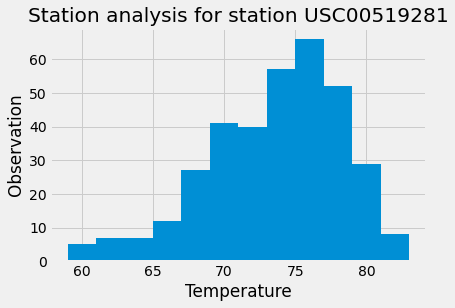

In [172]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation_data= session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281'). filter(Measurement.date > last_year)
observation_df=pd.DataFrame(observation_data).rename(columns={ 0:"date",
                                                 1: "tobs"})
plt.hist(observation_df["tobs"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Observation")
plt.title("Station analysis for station USC00519281")
plt.show()

# Close session

In [173]:
# Close Session
session.close()